## Question 1
Selon wikipedia, la gamme d'énergie des protons va de 70 MeV à 250 MeV. L'énergie maximale serait donc de 250 MeV. Ces niveaux d'énergies dépendent de la pénétration désirée pour le proton. Les facteurs de lorentz sont $\gamma$ et $\beta$ qui représentent :

$$\gamma=\frac{1}{\sqrt{1-\beta^{2}}}~avec~\beta=\frac{v}{c}$$

Comme le facteur de Lorentz sous-entend des vitesses relativistes alors on obtient $T$, l'énergie cinétique relativiste, selon :

$$T=\gamma mc^{2}-mc^{2}=mc^{2}(\gamma-1)$$

Il est possible d'isoler $\gamma$ ce qui nous donne :

$$\gamma=\frac{T}{mc^{2}}+1$$

## Question 2
Nous avons la masse volumique selon :

$$\rho=\frac{m}{V}$$

Ainsi que $N$, le nombre d'atomes par gramme. On cherche $n_e$, la densité électronique pour une matière donnée, donc $n_e~\left[\frac{e}{cm^3}\right]$. Du NIST, on a la masse volumique de l'os cortical et de l'eau en $g/cm^3$ ainsi que la fraction par masse des différents atomes qui compose la matière. Nous avons donc :

$$n_e=\rho NZ_{t}=\rho N\sum_{i=1}^{n}Z_{i}a_{i}$$

On peut obtenir $N$ en cosnidérant les masses molaires des différents atomes qui compose la matière :

$$N~\left[\frac{e^{-}}{cm^3}\right]\to \frac{N_{A}}{M_{m}}\cdot\rho\cdot Z_{t}~\left[\frac{atomes}{mol}\cdot\frac{mol}{g}\cdot\frac{g}{cm^3}\cdot e^{-}\right]$$

Donc :

$$n_e=\rho NZ_{t}=\rho \sum_{i=1}^{n}Z_{i}a_{i}\frac{N_{A}}{M_{mi}}$$

où $N_{A}$ est le nombre d'Avogadro et $M_{mi}$ est la masse molaire d'un atome qui compose la substance. Pour l'eau, avec $\rho=1~\left[\frac{g}{cm^3}\right]$, nous avons donc :

$$n_e=\left(\frac{1\cdot0.111894}{1.660540199\times10^{-24}}+\frac{8\cdot0.888106}{2.656698265\times10^{-23}}\right)~\left[\frac{e^{-}}{cm^3}\right]=3.3481\times10^{23}~\left[\frac{e^{-}}{cm^3}\right]$$

Avec $I=75~\left[eV\right]$. Les masses sont déterminées à partir des masses atomiques des éléments trouvées de www.ptable.com. Pour l'os cortical, avec $\rho=1.85~\left[\frac{g}{cm^3}\right]$ nous avons :

$$n_e=\left(.~.~.\right)=5.8121\times10^{23}~\left[\frac{e^{-}}{cm^3}\right]$$

avec $I=106.4~\left[eV\right]$. Les courbes sont donc :


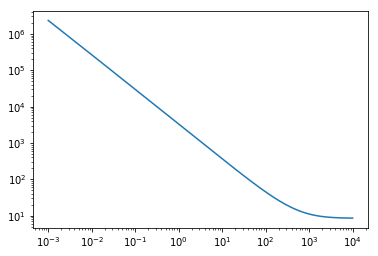

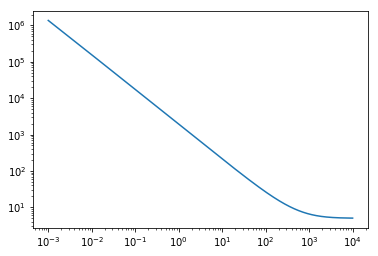

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


def protonSpeed(protonEnergy):
    mProton = 938.27208816
    protonSpeed = 2.998e+10 * np.sqrt(1 - (protonEnergy / mProton + 1) ** -2)
    return protonSpeed


def beta(protonSpeed):
    return protonSpeed / 2.998e+10


def gamma(protonEnergy):
    mProton = 938.27208816
    return (protonEnergy / mProton) + 1


def tMax(protonSpeed):
    mElectron = 0.51099895000
    mProton = 938.27208816
    g = gamma(protonSpeed)
    return (2 * mElectron * (g - 1)) / (
                1 + 2 * g * (mElectron / mProton) + (mElectron / mProton) ** 2)


def stoppingPower(nElectron, protonEnergy, i):
    rElectron = 2.81794033e-15 * 100
    mElectron = 0.51099895000
    pSpeed = protonSpeed(protonEnergy)
    g = gamma(pSpeed)
    b = beta(pSpeed)
    return 2 * np.pi * rElectron ** 2 * mElectron * nElectron * (1 / (b ** 2)) * \
           (np.log((2 * mElectron * (b ** 2) * (g ** 2) * tMax(pSpeed)) / (i ** 2)) - 2 * (b ** 2))


if __name__ == '__main__':
    energies = np.arange(0.001, 10000, 0.0005)

    bHydrogen = (1 * 0.047234 * 6.022e23) / (1.660540199e-24 * 6.022e23)
    bCarbon = (6 * 0.144330 * 6.022e23) / (1.994242358e-23 * 6.022e23)
    bNitrogen = (7 * 0.041990 * 6.022e23) / (2.325824007e-23 * 6.022e23)
    bOxygen = (8 * 0.446096 * 6.022e23) / (2.656703247e-23 * 6.022e23)
    bMagnesium = (12 * 0.002200 * 6.022e23) / (4.035776902e-23 * 6.022e23)
    bPhosphorus = (15 * 0.104970 * 6.022e23) / (5.143317694e-23 * 6.022e23)
    bSulfur = (16 * 0.003150 * 6.022e23) / (5.323525827e-23 * 6.022e23)
    bCalcium = (20 * 0.209930 * 6.022e23) / (6.655113013e-23 * 6.022e23)
    bZinc = (30 * 0.000100 * 6.022e23) / (1.085661182e-22 * 6.022e23)
    bNElectron = 1.85 * (bHydrogen + bCarbon + bNitrogen + bOxygen + bMagnesium + bPhosphorus + bSulfur + bCalcium + bZinc)
    bI = 106.4 / 1000000
    plt.plot(energies, stoppingPower(bNElectron, energies, bI))
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

    hydrogen = (1 * 0.111894 * 6.022e23) / (1.660540199e-24 * 6.022e23)
    oxygen = (8 * 0.888106 * 6.022e23) / (2.656703247e-23 * 6.022e23)
    nElectron = 1 * (hydrogen + oxygen)
    i = 75 / 1000000
    plt.plot(energies, stoppingPower(nElectron, energies, i))
    plt.xscale('log')
    plt.yscale('log')
    plt.show()


## Question 3
$\frac{S_{col}}{\rho}$ est le pouvoir d'arrêt collisionnel massique. On sait que $S_{col}$ est :

$$S_{col}=2\pi r_{e}^{2}m_{e}c^{2}n_{e}\frac{1}{\beta^{2}}\left[ln\left(\frac{2m_{e}c^{2}\beta^{2}\gamma^{2}T_{e}^{max}}{I^{2}}\right)-2\beta^{2}\right]$$

$\rho$ est la masse volumique, donc :

$$\rho=\frac{m}{V}~\left[\frac{g}{cm^3}\right]$$